# Introduction To Regression With Neural Networks in TensorFlow

In [1]:
import tensorflow as tf

tf.__version__

'2.10.0'

## Creating The Data and Features

In [2]:
import numpy as np
import matplotlib.pyplot as plt

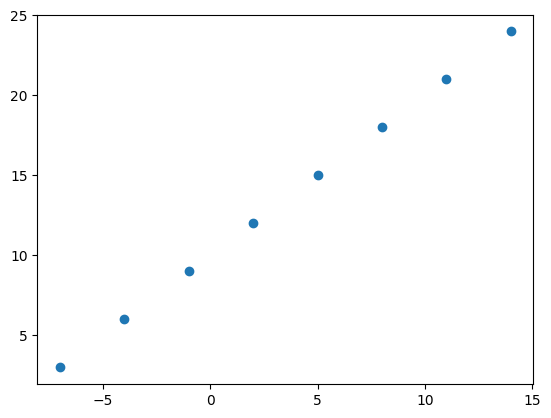

In [3]:
# Creating the data
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Plotting the thing
plt.scatter(X, y)

In [4]:
# Turning np arrays to tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
inputShape = X[0].shape
outputShape = y[0].shape

inputShape, outputShape

(TensorShape([]), TensorShape([]))

## Steps In modelling with TensorFlow

1. **Creating A Model** :-
    - define the input and output laters
    - define the hidden layers
2. **Compiling A Model** :- 
    - define the loss function (the function which tells our model how wrong it is)
    - define the optimizer (the function which tells our model how to improve the patterns it's larning)
    - evaluation metrics (what we can use to interpret the performacne of our model)
3. **Fitting A Model** :-
    - letting the model to try and find patterns between `X` and `y` or (features and labels)_

In [6]:
# Setting the random seed
tf.random.set_seed(38)

# 1. Creating a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
  loss=tf.keras.losses.mae, # mean absolute error
  optimizer=tf.keras.optimizers.SGD(), # schocastic gradient descent
  metrics=['mae']
)

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 613ms/step - loss: 12.3561 - mae: 12.3561
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 12.2236 - mae: 12.2236
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 12.0911 - mae: 12.0911
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.9586 - mae: 11.9586
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 11.8261 - mae: 11.8261


In [7]:
# Relationship between X and y is y = X + 10

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
# Predicting the values
model.predict([17.0])

1/1 [==============================] - 0s 166ms/step


array([[8.581147]], dtype=float32)

## Improving Our Model

The steps that we can follow to improve our model and it's predictions are :- 
1. **Creating the model** - 
    - Increase the number of layers
    - Increase the number of hidden units (also called neurons) within the hidden layers
    - change the activation function of each layer
2. **Compiling the model** -
    - changing the optimization function
    - changing the learning rate of the model
3. **Fitting the model** - 
    - change the number of epochs (fitting the data for longer time)
    - give the model more data to train on


In [9]:
# Let's rebuild the model. But this time, change the epochs only

# 1. Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
  optimizer=tf.optimizers.SGD(),
  loss=tf.keras.metrics.mae,
  metrics=['mae']
)

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 386ms/step - loss: 12.2010 - mae: 12.2010
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0685 - mae: 12.0685
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9360 - mae: 11.9360
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8035 - mae: 11.8035
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6710 - mae: 11.6710
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5385 - mae: 11.5385
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4060 - mae: 11.4060
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2735 - mae: 11.2735
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1410 - mae: 11.1410
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0085 - mae: 11.0085
Epoch 11/100
1/1 [==============================] - 0s 8

In [11]:
# Prediction
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.764275]], dtype=float32)

In [12]:
# Making some other change to get better predictions

# 1. Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
  loss=tf.keras.losses.mae,
  metrics=["mae"],
  optimizer=tf.keras.optimizers.SGD()
)

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 471ms/step - loss: 14.1780 - mae: 14.1780
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6654 - mae: 13.6654
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1643 - mae: 13.1643
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6692 - mae: 12.6692
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1910 - mae: 12.1910
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7059 - mae: 11.7059
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2068 - mae: 11.2068
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6915 - mae: 10.6915
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1564 - mae: 10.1564
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6005 - mae: 9.6005
Epoch 11/100
1/1 [==============================] - 0s 8ms/

In [13]:
# Predicting the data
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[32.055916]], dtype=float32)

## Evaluating The Model

In practice, the typical workflow towards building neural networks is

> build -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak ...

### For Evaluation - The most **important** factor is **VISUALIZATION**

We can visualize the following things :- 
1. The data - _what are we working with? what does it look like?_
2. The model - _what does our model look like?_
3. The training of model - _how does the model perform while it learns?_
4. The predictions of model - _how well the predictions of the model hold up against the ground truth (actual values_

In [1]:
## Making a bigger dataset
import tensorflow as tf

X = tf.range(-100, 100, 4, dtype=tf.int32)

X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [2]:
y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

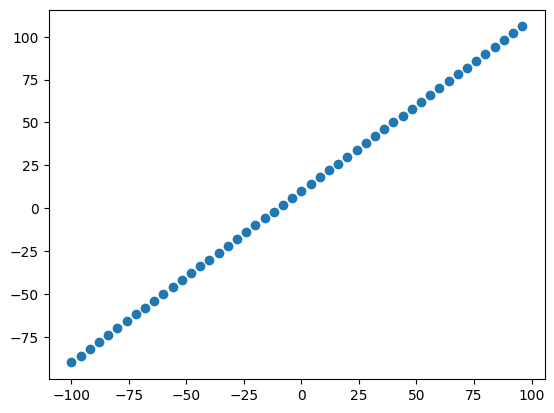

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

plt.scatter(X, y)
plt.show()

In [4]:
# Splitting the data into training and testing set
X_train = X[: 40]
y_train = y[: 40]

X_test = X[40: ]
y_test = y[40: ]

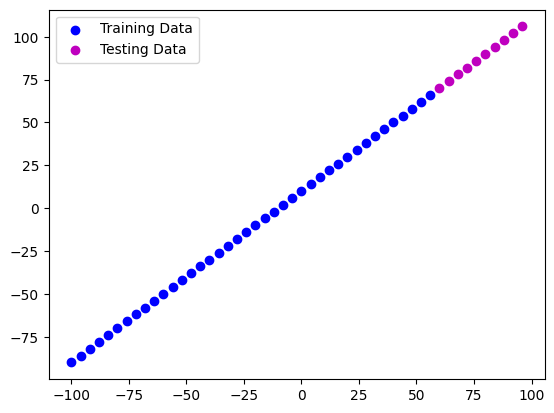

In [5]:
# Visualizing the training and testing data

plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="m", label="Testing Data")
plt.legend()
plt.show()

In [30]:
# Let's build a model for the data

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]), # input shape is 1 because we have one input mapped to one output
  tf.keras.layers.Dense(1)
])

model.compile(
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["mae"],
  loss=tf.keras.losses.mae
)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


- **Total params** - The total number of parameters in the model
- **Trainable Params** - The number of params that the model can change and edit when its training
- **Non-Trainable Params** - The number of params that have already come with the pre-trained model and we can *freeze* them so that they don't get edited. *(Done in transfer learning)*

In [32]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, dpi=200, show_shapes=True)

NameError: name 'model' is not defined

#### Visualising The Model's Predictions

In [34]:
# Making some predictions to create y_preds
y_preds = model.predict(X_test)

y_preds

1/1 [==============================] - 0s 71ms/step


array([[ 73.111725],
       [ 77.86975 ],
       [ 82.62778 ],
       [ 87.3858  ],
       [ 92.14383 ],
       [ 96.901855],
       [101.65988 ],
       [106.41791 ],
       [111.175934],
       [115.93395 ]], dtype=float32)

In [11]:
def plot_predictions(
                      predictions,
                      train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                    ):
  plt.figure(figsize=(10, 7))
  # Plotting the training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # Plotting the testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  # Plotting the predicted data in red
  plt.scatter(test_data, predictions, c="r", label="Predicted Data")
  
  plt.legend()


In [12]:
plot_predictions()

TypeError: plot_predictions() missing 1 required positional argument: 'predictions'

### Evaluating The Model With Regression Metrics

In [41]:
mae = tf.keras.metrics.mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.5228415>

In [42]:
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=47.287937>

## Running experiments to improve the model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ... 
```

### To Improve A Model, We Can Do 3 Things
1. Get more data - get more samples or examples of the data for your model to train on.
2. Make your model larger - use more number of layers or more number of hidden units (use more complex model)
3. Train for longer - use more epochs to train the model for longer.


### Let us run 3 modelling experiments:
1. `model_1` - 1 layer, 100 epochs
2. `model_2` - 2 layers, 100 epochs
3. `model_3` - 2 layers, 500 epochs

### **Building `model_1`**

_1 dense layer trained for 100 epochs_

In [17]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(
  optimizer=tf.keras.optimizers.SGD(),
  loss=tf.keras.losses.MAE,
  metrics=["mae", "mse"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.5036 - mae: 15.5036 - mse: 322.2681
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 13.5129 - mae: 13.5129 - mse: 244.9921
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5084 - mae: 11.5084 - mse: 177.0229
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9638 - mae: 12.9638 - mse: 187.4348
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9629 - mae: 9.9629 - mse: 114.9478
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.9021 - mae: 10.9021 - mse: 157.6021
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4838 - mae: 8.4838 - mse: 94.0212
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2709 - mae: 11.2709 - mse: 154.2456
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0032 - mae: 9.0032 - mse: 110.2481
Epoch 10/100
2/2

1/1 [==============================] - 0s 82ms/step


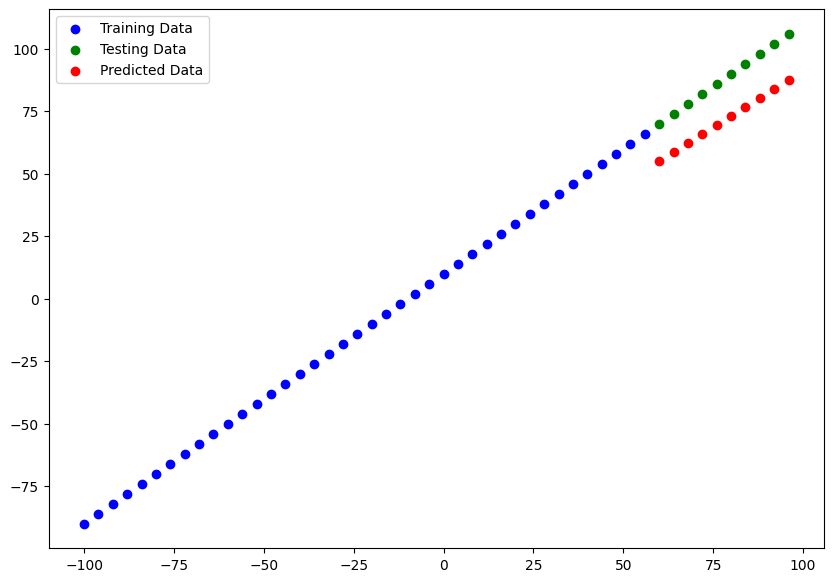

In [18]:
# Making and plotting predictions for model_1

y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [19]:
# Evaluating the model
(
tf.keras.metrics.mae(y_test, tf.squeeze(y_preds_1)),
tf.keras.metrics.mse(y_test, tf.squeeze(y_preds_1))
)

(<tf.Tensor: shape=(), dtype=float32, numpy=16.71857>,
 <tf.Tensor: shape=(), dtype=float32, numpy=280.91846>)

### **Building `model_2`**
_2 Dense layers trained for 100 epochs_

In [35]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(
  optimizer=tf.keras.optimizers.SGD(),
  loss=tf.keras.losses.mae,
  metrics=["mse"]
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 62.0273 - mse: 6245.7490
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 24.3992 - mse: 874.5142
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 23.4588 - mse: 731.7137
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 30.6180 - mse: 1453.6580
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2153 - mse: 120.8199
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 28.3959 - mse: 1164.3258
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 15.8315 - mse: 327.6299
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 25.8442 - mse: 936.2903
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4598 - mse: 127.6936
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 16.4016 - mse: 394.5344
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 149ms/step


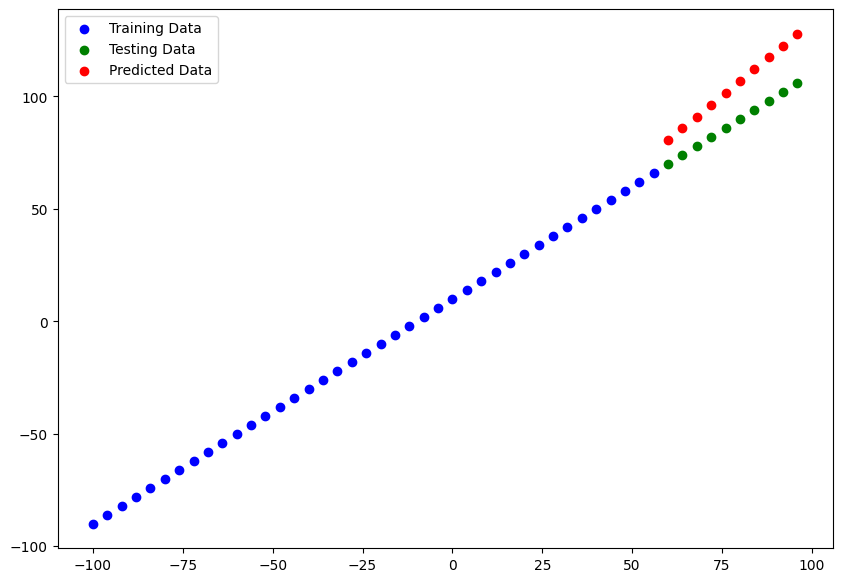

In [36]:
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions=y_preds_2)

In [38]:
(
  tf.keras.metrics.mae(y_test, tf.squeeze(y_preds_2)),
  tf.keras.metrics.mse(y_test, tf.squeeze(y_preds_2))
)

(<tf.Tensor: shape=(), dtype=float32, numpy=16.17285>,
 <tf.Tensor: shape=(), dtype=float32, numpy=274.5267>)

### **Building `model_3`**

_2 Dense layers trained for 500 epochs_

In [40]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(
  optimizer=tf.keras.optimizers.SGD(),
  loss=tf.keras.losses.mae,
  metrics=["mse", "mae"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 22.4912 - mse: 775.4673 - mae: 22.4912
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 32.5074 - mse: 1532.0823 - mae: 32.5074
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2965 - mse: 210.7327 - mae: 11.2965
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 12.2519 - mse: 194.5142 - mae: 12.2519
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 24.5892 - mse: 843.1859 - mae: 24.5892
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 13.9960 - mse: 255.9331 - mae: 13.9960
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 15.7916 - mse: 391.1271 - mae: 15.7916
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.6288 - mse: 145.8553 - mae: 10.6288
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 7.5126 - mse: 82.5362 - mae: 7.5126
Epoch 10/500

1/1 [==============================] - 0s 45ms/step


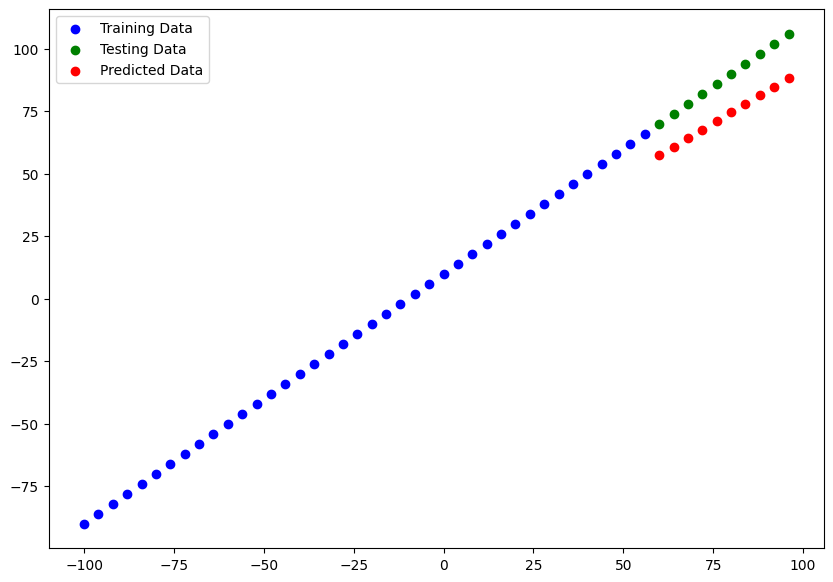

In [41]:
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)

In [42]:
(
  tf.keras.metrics.mae(y_test, tf.squeeze(y_preds_3)),
  tf.keras.metrics.mse(y_test, tf.squeeze(y_preds_3))
)

(<tf.Tensor: shape=(), dtype=float32, numpy=15.187258>,
 <tf.Tensor: shape=(), dtype=float32, numpy=233.27588>)

In [48]:
from tensorflow.keras.utils import plot_model

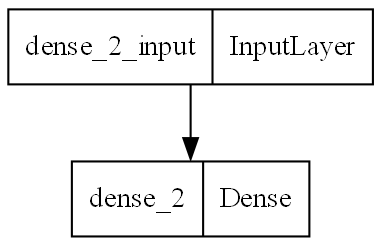

In [52]:
plot_model(model_1, dpi=150)

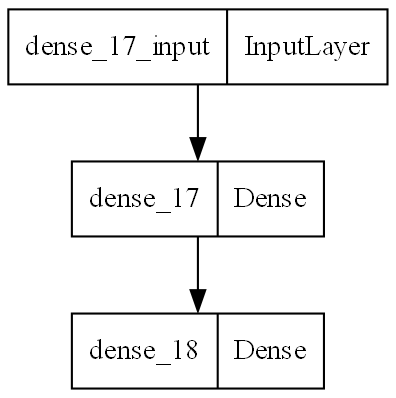

In [53]:
plot_model(model_2, dpi=150)

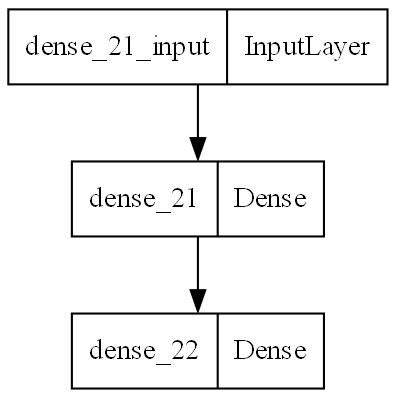

In [54]:
plot_model(model_3, dpi=150)